In [1]:
import mediapipe as mp
import cv2
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing


In [147]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [165]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = hands.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Right hand
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS)


                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [166]:
prev=""
liste=[]
for letter in (str(hand_landmarks)):
    try:
        number=int(letter)
        prev+=letter
    except:
        if letter=="-" or letter =='.' or letter =='e':
            prev+=letter
        elif prev != "" and len(prev)>2:
            liste.append(float(prev))
            prev=""


print(len(liste)/3)

21.0


In [12]:
data=pd.read_csv('train_labels.csv')
data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,00002.png,640,480,c,286,158,420,328
1,00003.png,640,480,y,275,229,432,424
2,00004.png,640,480,y,167,161,382,380
3,00005.png,640,480,z,312,232,453,431
4,00006.png,640,480,z,289,175,415,391


In [4]:
filenames=data['filename'].values
print(filenames)

['00002.png' '00003.png' '00004.png' ... 'z_7.png' 'z_8.png' 'z_9.png']


In [5]:
%cd train 

c:\Users\julie\Desktop\landmarks\train


In [6]:

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
megaListe=[]
filename_final=[]
# For static images:
with mp_holistic.Holistic(static_image_mode=True) as holistic:
  for idx, file in enumerate(filenames):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(image)

    if results.pose_landmarks:
      
        hand_landmarks= results.right_hand_landmarks
        prev=""
        liste=[]
        for letter in (str(hand_landmarks)):
            try:
                number=int(letter)
                prev+=letter
            except:
                if letter=="-" or letter =='.' or letter =='e':
                    prev+=letter
                elif prev != "" and len(prev)>2:
                    liste.append(float(prev))
                    prev=""
    if len(liste)>0:
        print(file)
        filename_final.append(file)
        megaListe.append(liste)



00119.png
00120.png
00121.png
00122.png
00123.png
00124.png
00125.png
00126.png
00127.png
00167.png
00168.png
00169.png
00170.png
00171.png
00172.png
00173.png
00174.png
00175.png
00189.png
00190.png
00191.png
00192.png
00200.png
00207.png
00247.png
00272.png
00274.png
00279.png
00283.png
00284.png
00285.png
00286.png
A17.jpg
A4.jpg
A5.jpg
A7.jpg
a_9.png
B0.jpg
B1.jpg
B3.jpg
B6.jpg
B7.jpg
B8.jpg
b_2.png
b_25.png
b_26.png
b_27.png
b_28.png
C0.jpg
C1.jpg
C2.jpg
C3.jpg
C5.jpg
C7.jpg
C8.jpg
C9.jpg
D0.jpg
D1.jpg
D2.jpg
D6.jpg
d_6.png
E0.jpg
E1.jpg
E2.jpg
E5.jpg
E6.jpg
E9.jpg
e_1.png
e_2.png
e_25.png
F1.jpg
F2.jpg
F3.jpg
F6.jpg
F7.jpg
frame_10056.jpg
frame_10067.jpg
frame_10082.jpg
frame_10474.jpg
frame_10477.jpg
frame_10480.jpg
frame_10483.jpg
frame_10486.jpg
frame_10489.jpg
frame_10492.jpg
frame_10495.jpg
frame_10590.jpg
frame_10594.jpg
frame_10601.jpg
frame_10608.jpg
frame_10644.jpg
frame_10882.jpg
frame_10899.jpg
frame_11045.jpg
frame_11049.jpg
frame_11053.jpg
frame_11057.jpg
frame_11061

In [8]:
dataLabels=pd.DataFrame(megaListe)

In [42]:
classe=data['class'].values
indexes=[]
for element in filename_final:
    indexes.append(np.where(filenames==element))
classe=classe[indexes]
classlist=[]
for element in classe:
    classlist.append(element[0][0])

dataLabels['classe']=classlist

(794, 64)

In [43]:
dataLabels.to_csv('labellised_data.csv')


In [2]:
dataLabels=pd.read_csv('labellised_data.csv',sep=';')

In [3]:
dataLabels

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,classe
0,0.233467,0.877692,-0.000020,0.276154,0.901083,-0.037816,0.295906,0.937619,-0.076339,0.300179,...,0.178426,0.995133,-0.126697,0.175585,1.020865,-0.140277,0.176958,1.039768,-0.149001,f
1,0.233467,0.877692,-0.000020,0.276154,0.901083,-0.037816,0.295906,0.937619,-0.076339,0.300179,...,0.178426,0.995133,-0.126697,0.175585,1.020865,-0.140277,0.176958,1.039768,-0.149001,f
2,0.233467,0.877692,-0.000020,0.276154,0.901083,-0.037816,0.295906,0.937619,-0.076339,0.300179,...,0.178426,0.995133,-0.126697,0.175585,1.020865,-0.140277,0.176958,1.039768,-0.149001,g
3,0.233467,0.877692,-0.000020,0.276154,0.901083,-0.037816,0.295906,0.937619,-0.076339,0.300179,...,0.178426,0.995133,-0.126697,0.175585,1.020865,-0.140277,0.176958,1.039768,-0.149001,g
4,0.233467,0.877692,-0.000020,0.276154,0.901083,-0.037816,0.295906,0.937619,-0.076339,0.300179,...,0.178426,0.995133,-0.126697,0.175585,1.020865,-0.140277,0.176958,1.039768,-0.149001,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0.273421,0.755257,0.000022,0.301935,0.698028,-0.106214,0.297510,0.634146,-0.178635,0.256815,...,0.173336,0.720887,-0.203693,0.203546,0.736268,-0.191212,0.215639,0.725249,-0.167447,z
790,0.278920,0.758895,0.000032,0.292403,0.689952,-0.103132,0.274215,0.630008,-0.172479,0.228903,...,0.157719,0.756514,-0.182889,0.188038,0.762773,-0.186234,0.204271,0.746787,-0.176641,z
791,0.259810,0.819565,-0.000046,0.279356,0.741597,-0.097813,0.263712,0.667828,-0.170983,0.223230,...,0.147355,0.826815,-0.248327,0.153389,0.821499,-0.274506,0.156185,0.803382,-0.286039,z
792,0.255378,0.807988,0.000006,0.300930,0.777797,-0.060851,0.332365,0.720530,-0.114647,0.329199,...,0.205454,0.675463,-0.184103,0.238157,0.722894,-0.176182,0.265207,0.750860,-0.158482,z


In [4]:
X=dataLabels.iloc[:,:-1].values
y=dataLabels['classe'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
print(len(np.unique(y_train)))
print(len(np.unique(y_test)))

26
26


In [7]:
X_train[0]

array([ 2.6612530e-01,  5.1398504e-01, -2.6079942e-05,  2.8840083e-01,
        4.7190738e-01, -1.1461802e-02,  2.9135220e-01,  4.0683186e-01,
       -1.5232314e-02,  2.7665920e-01,  3.4953642e-01, -2.2529617e-02,
        2.5370264e-01,  3.1593782e-01, -3.3778840e-02,  2.8710794e-01,
        3.5883340e-01,  2.6989419e-02,  2.8662905e-01,  3.0309537e-01,
       -1.5772977e-03,  2.8631818e-01,  3.2357080e-01, -2.0686219e-02,
        2.8669897e-01,  3.5152605e-01, -2.3479797e-02,  2.6461902e-01,
        3.5930476e-01,  2.6078550e-02,  2.5548460e-01,  3.0853218e-01,
       -3.4890247e-03,  2.6122454e-01,  3.5517764e-01, -1.8646805e-02,
        2.6702443e-01,  3.9455447e-01, -1.6698327e-02,  2.4318881e-01,
        3.6909303e-01,  2.0281990e-02,  2.3414750e-01,  3.2130830e-01,
       -1.3038644e-02,  2.4571615e-01,  3.6736107e-01, -2.3684047e-02,
        2.5326177e-01,  4.0720513e-01, -1.7880728e-02,  2.2319782e-01,
        3.8190344e-01,  1.3960153e-02,  2.1449030e-01,  3.2107964e-01,
      

In [8]:
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [9]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(63,activation='relu',input_shape=(63,)))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(40,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))


model.add(tf.keras.layers.Dense(26,activation='softmax'))



model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
print(model.summary())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 63)                4032      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3200      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                806       
Total params: 11,308
Trainable params: 11,308
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential"
_________________________________________________________________
Layer (type)               

In [10]:
H = model.fit(
	X_train, y_train,
	validation_data=(X_test, y_test),
	batch_size=4,
	epochs=300,
  shuffle=True,
	verbose=1)

Epoch 1/300
139/139 [==============================] - 4s 21ms/step - loss: 3.2656 - accuracy: 0.0516 - val_loss: 3.2360 - val_accuracy: 0.0586
Epoch 2/300
139/139 [==============================] - 0s 2ms/step - loss: 3.2303 - accuracy: 0.0560 - val_loss: 3.1900 - val_accuracy: 0.0837
Epoch 3/300
139/139 [==============================] - 0s 2ms/step - loss: 3.1521 - accuracy: 0.0959 - val_loss: 3.0517 - val_accuracy: 0.1339
Epoch 4/300
139/139 [==============================] - 0s 2ms/step - loss: 3.0168 - accuracy: 0.1256 - val_loss: 3.0114 - val_accuracy: 0.1381
Epoch 5/300
139/139 [==============================] - 0s 2ms/step - loss: 2.9641 - accuracy: 0.0996 - val_loss: 2.9100 - val_accuracy: 0.1506
Epoch 6/300
139/139 [==============================] - 0s 2ms/step - loss: 2.8403 - accuracy: 0.1409 - val_loss: 2.8516 - val_accuracy: 0.1172
Epoch 7/300
139/139 [==============================] - 0s 2ms/step - loss: 2.7933 - accuracy: 0.1281 - val_loss: 2.8752 - val_accuracy: 0.138

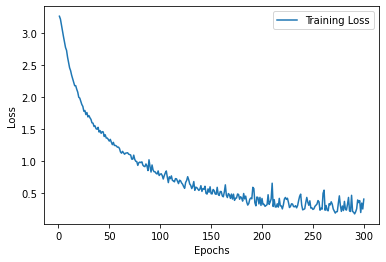

Nous avons une accuracy de : 0.6276150627615062


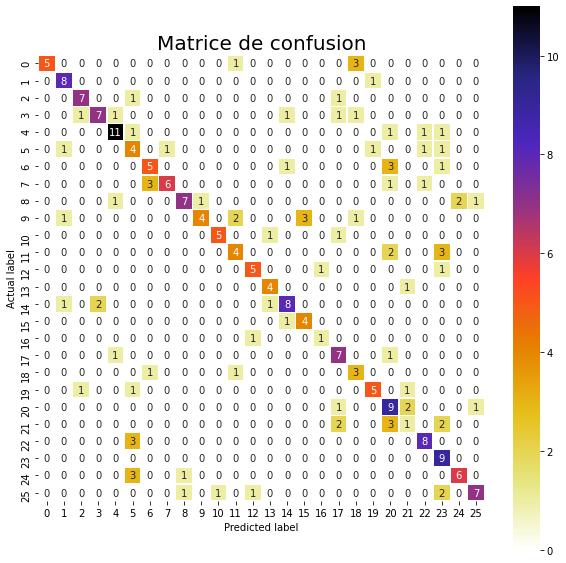

In [11]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 

y_pred=model.predict(X_test)
prob=[]
for pred in y_pred:
    prob.append(np.argmax(pred))
y_pred=prob  
score=metrics.accuracy_score(y_test,y_pred)

loss_values = H.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("Nous avons une accuracy de : {}".format(score))

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'CMRmap_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()

In [12]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [52]:
cap = cv2.VideoCapture(0)
varList=[]
space_count=0
sentence=""
#CV2 put text function
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,300)
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 2
bottom = (250,450)


with mp_holistic.Holistic(
    min_detection_confidence=0.6,
    min_tracking_confidence=0.6) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    image_hight, image_width, _ = image.shape
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = holistic.process(image)
    color_space = (0,255,0)
    color_suppr = color_space
    if results.pose_landmarks:
            

        
            hand_landmarks= results.right_hand_landmarks
            left_hand_landmarks= results.left_hand_landmarks

            if left_hand_landmarks:
                x_left=float(left_hand_landmarks.landmark[mp_holistic.HandLandmark.INDEX_FINGER_TIP].x * image_width)
                y_left=float(left_hand_landmarks.landmark[mp_holistic.HandLandmark.INDEX_FINGER_TIP].y * image_hight)
                if x_left>450 and x_left<550 and y_left>250 and y_left<350:
                    space_count=space_count+1
                    if space_count>10:
                        space_count=0
                        sentence+=" "
                        color_space = (0,0,255)
                if x_left>550 and x_left<650 and y_left>250 and y_left<350:
                    space_count=space_count+1
                    if space_count>10:
                        space_count=0
                        sentence=sentence[:-1]
                        color_suppr = (0,0,255)
            
            prev=""
            liste=[]
            for letter in (str(hand_landmarks)):
                try:
                    number=int(letter)
                    prev+=letter
                except:
                    if letter=="-" or letter =='.' or letter =='e':
                        prev+=letter
                    elif prev != "" and len(prev)>2:
                        liste.append(float(prev))
                        prev=""

                    
    if len(liste)>0:
        var=(le.inverse_transform([np.argmax(model.predict([liste]))]))
        varList.append(var)

        cv2.putText(image,var[0], 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            lineType)


        if varList.count(var)>15:
            sentence+=var[0]
            varList=[]

    cv2.putText(image,sentence, 
            bottom, 
            font, 
            fontScale,
            fontColor,
            lineType)
        


    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    cv2.rectangle(image,(450,250),(550,350),color_space,3)
    cv2.putText(image,"espace", 
        (450,240), 
        font, 
        0.5,
        fontColor,
        lineType)

    cv2.rectangle(image,(550,250),(650,350),color_suppr,3)
    cv2.putText(image,"suppr", 
        (550,240), 
        font, 
        0.5,
        fontColor,
        lineType)


    cv2.imshow('MediaPipe Holistic', image)


            
    if cv2.waitKey(5) & 0xFF == ord('q'):
      break
cap.release()
cv2.destroyAllWindows()